In [2]:
import sys
sys.path
sys.path.append('../')

In [3]:
from torchvision import datasets, transforms
import src.actlearn as al

In [5]:
train_mnist = datasets.MNIST('./data', train=True, download=True)
test_mnist = datasets.MNIST('./data', train=False, download=True)
train_fashion = datasets.FashionMNIST('./data', train=True, download=True, transform=transforms.ToTensor())
test_fashion = datasets.FashionMNIST('./data', train=False, download=True, transform=transforms.ToTensor())

X_train_mnist = train_mnist.data
y_train_mnist = train_mnist.targets
X_test_mnist = test_mnist.data
y_test_mnist = test_mnist.targets

X_train_fashion = train_fashion.data
y_train_fashion = train_fashion.targets
X_test_fashion = test_fashion.data
y_test_fashion = test_fashion.targets

alpha = 1
def reduce_dataset(X, y, alpha, seed=42):
    n_samples = len(X)
    n_keep = int(alpha * n_samples)

    return X[:n_keep], y[:n_keep]

X_train_mnist, y_train_mnist = reduce_dataset(X_train_mnist, y_train_mnist, alpha)
X_test_mnist, y_test_mnist = reduce_dataset(X_test_mnist, y_test_mnist, alpha)
X_train_fashion, y_train_fashion = reduce_dataset(X_train_fashion, y_train_fashion, alpha)
X_test_fashion, y_test_fashion = reduce_dataset(X_test_fashion, y_test_fashion, alpha)
print(X_train_mnist.shape, y_train_mnist.shape, X_test_mnist.shape, y_test_mnist.shape)
print(X_train_fashion.shape, y_train_fashion.shape, X_test_fashion.shape, y_test_fashion.shape)

torch.Size([60000, 28, 28]) torch.Size([60000]) torch.Size([10000, 28, 28]) torch.Size([10000])
torch.Size([60000, 28, 28]) torch.Size([60000]) torch.Size([10000, 28, 28]) torch.Size([10000])


In [6]:
AL1 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="random", al_type="incremental", update_size=128, batch_size=128, metric="f1")
AL2 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="entropy", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=2)
AL3 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="confidence", al_type="incremental", update_size=128, batch_size=128, metric="f1")
AL4 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1")

In [7]:
AL1.fit()
AL2.fit()
AL3.fit()
AL4.fit()


AL TRAINING STARTED
Training AL: incremental random | Доля: 0.213
Training AL: incremental random | Доля: 0.427
Training AL: incremental random | Доля: 0.640
Training AL: incremental random | Доля: 0.853
Training AL: incremental random | Доля: 1.067
Training AL: incremental random | Доля: 1.280
Training AL: incremental random | Доля: 1.493
Training AL: incremental random | Доля: 1.707
Training AL: incremental random | Доля: 1.920
Training AL: incremental random | Доля: 2.133
Training AL: incremental random | Доля: 2.347
Training AL: incremental random | Доля: 2.560
Training AL: incremental random | Доля: 2.773
Training AL: incremental random | Доля: 2.987
Training AL: incremental random | Доля: 3.200
Training AL: incremental random | Доля: 3.413
Training AL: incremental random | Доля: 3.627
Training AL: incremental random | Доля: 3.840
Training AL: incremental random | Доля: 4.053
Training AL: incremental random | Доля: 4.267
Training AL: incremental random | Доля: 4.480
Training AL: i

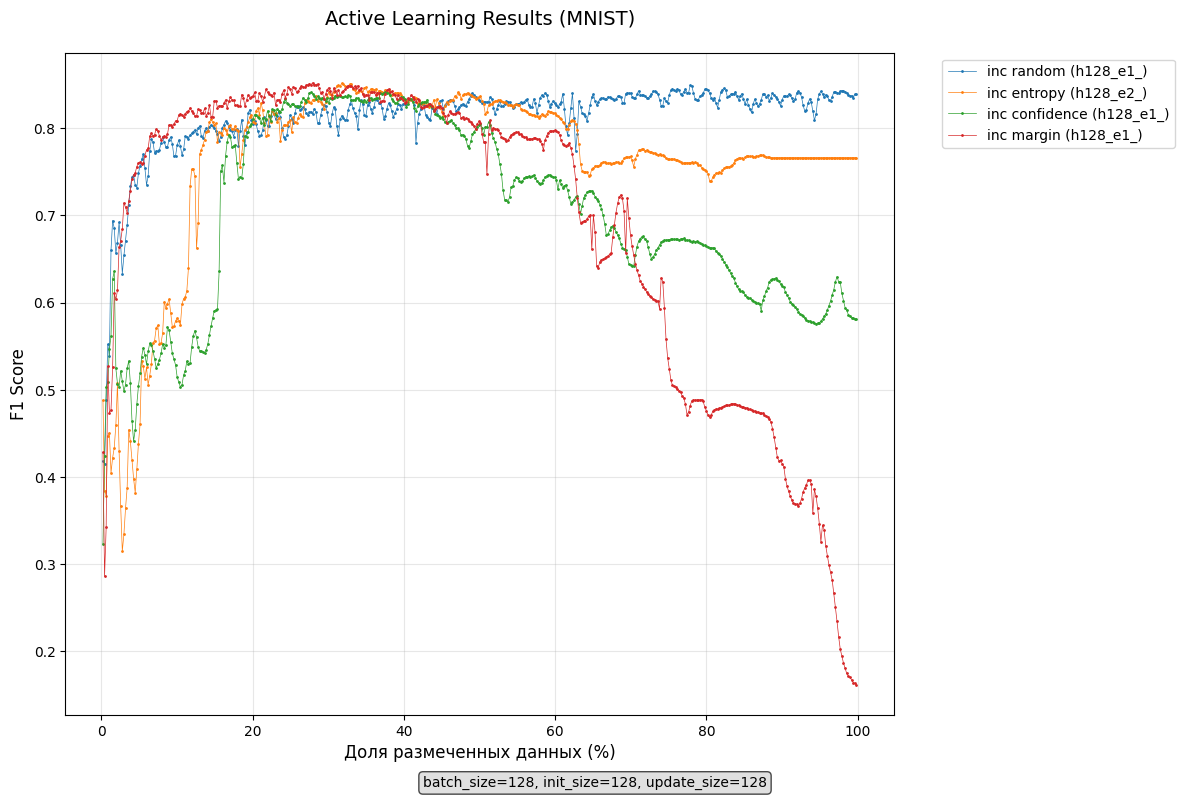

In [32]:
al.plot_active_learning_results_many(AL1, AL2, AL3, AL4, dataset_name="MNIST")

In [8]:
al.plot_active_learning_results(AL4, dataset_name="MNIST")

✅ График сохранен как 'active_learning_chart.html'. Скачивание начнется автоматически...
